Лабораторна робота № 4
Смислов Даніл
ІП-01

Спочатку імпортуємо потрібні для роботи бібліотеки

In [1]:
from dataclasses import replace
import pandas as pd 
import matplotlib.pyplot as plt

Далі імпортуємо дані з файлу Data2.csv з кодуванням 'cp1252' та розділювачем ';'. Розглянемо структуру датафрейму.

In [2]:
def getDataset():
    data = pd.read_csv('Data2.csv',sep=';',encoding='cp1252')
    return data 

dataset = getDataset()
dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    object 
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    object 
 5   Area            217 non-null    object 
dtypes: float64(1), object(5)
memory usage: 10.3+ KB


,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,"561,7787463",34656032.0,"9809,225",652860
1,Albania,Europe & Central Asia,"4124,98239",2876101.0,"5716,853",28750
2,Algeria,Middle East & North Africa,"3916,881571",40606052.0,"145400,217",2381740
3,American Samoa,East Asia & Pacific,"11834,74523",55599.0,NaN,200
4,Andorra,Europe & Central Asia,"36988,62203",77281.0,"462,042",470
5,Angola,Sub-Saharan Africa,"3308,700233",28813463.0,"34763,16",1246700
6,Antigua and Barbuda,Latin America & Caribbean,"14462,17628",100963.0,"531,715",440
7,Argentina,Latin America & Caribbean,"12440,32098",43847430.0,"204024,546",2780400
8,Armenia,Europe & Central Asia,"3614,688357",2924816.0,"5529,836",29740
9,Aruba,Latin America & Caribbean,NaN,104822.0,"872,746",180


Бачимо, що проблема з типами даних. Напишемо функцію, що конвертує в тип float та заміняє ',' на '.'. Застосуємо до стовпців, перевіримо типи. 

In [3]:
def toFloat(dataset,columnName):
    dataset[columnName] = dataset[columnName].str.replace(',', '.').astype(float)

toFloat(dataset,'GDP per capita')
toFloat(dataset,'CO2 emission')
toFloat(dataset,'Area')
dataset.dtypes



Country Name       object
Region             object
GDP per capita    float64
Populatiion       float64
CO2 emission      float64
Area              float64
dtype: object

Окей, з типами проблему вирішили. Далі я помітив проблему з очевидно некоректними від'ємними даними в певних стовпцях. Давайте напишемо процедуру та замінимо від'ємні значення на абсолютні. Також для перевірки виведемо чи залишились в нас від'ємні значення. 

In [4]:
def replaceNeg(dataset,columnName):
    dataset[columnName] = abs(dataset[columnName])

replaceNeg(dataset,'Area')
replaceNeg(dataset,'GDP per capita')

print(dataset[dataset['Area']<0])
print(dataset[dataset['GDP per capita']<0])

Empty DataFrame
Columns: [Country Name, Region, GDP per capita, Populatiion, CO2 emission, Area]
Index: []
Empty DataFrame
Columns: [Country Name, Region, GDP per capita, Populatiion, CO2 emission, Area]
Index: []


Також помітив, що є NULL значення. Давайте замінимо їх на середні значення. Перевіримо вигляд даних тепер.

In [5]:
def replaceNull(dataset,columnName):
    mean = dataset[columnName].mean()
    dataset[columnName].fillna(mean,inplace = True)
replaceNull(dataset,'CO2 emission')
replaceNull(dataset,'GDP per capita')
replaceNull(dataset,'Populatiion')
dataset.head(10)


,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470.0
5,Angola,Sub-Saharan Africa,3308.700233,28813463.0,34763.160000,1246700.0
6,Antigua and Barbuda,Latin America & Caribbean,14462.176280,100963.0,531.715000,440.0
7,Argentina,Latin America & Caribbean,12440.320980,43847430.0,204024.546000,2780400.0
8,Armenia,Europe & Central Asia,3614.688357,2924816.0,5529.836000,29740.0
9,Aruba,Latin America & Caribbean,13445.593416,104822.0,872.746000,180.0


Дані готові для роботи з ними. Давайте перевіримо які з параметрів розподілені за нормальним законом. Для цього додатково імпортуємо бібліотеку.

In [6]:
import scipy.stats as stats

Побудуємо для наглядності гістограми.

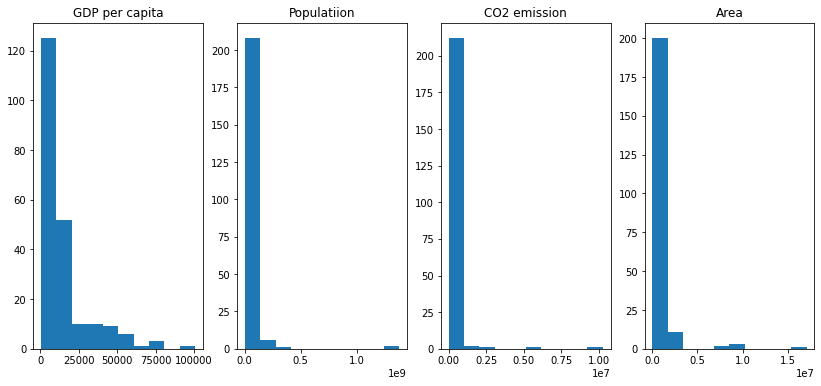

In [7]:
fig, axs = plt.subplots(1,4,figsize = (14,6))
fig.suptitle = ('Hists:')

list = ['GDP per capita','Populatiion','CO2 emission', 'Area']

for i in range(4):
    axs[i].set_title(list[i])
    axs[i].hist(dataset[list[i]])
plt.show()

Перевіримо нормальність розподілу за допомогою критерію Пірсона, адже розмір вибірки є досить великим

In [8]:
def testPirsona(data):
    statistic, p = stats.normaltest(data)
    print('Pirsona:', 'Statistic: %.4f P: %.30f' % (statistic,p))
    if(p > 0.05):
        print('Нормальний розподіл')
    else:
        print('Не нормальний розподіл')

print('Normal test of GDP per capita: ')
testPirsona(dataset['GDP per capita'])

print('Normal test of Populatiion: ')
testPirsona(dataset['Populatiion'])

print('Normal test of CO2 emission: ')
testPirsona(dataset['CO2 emission'])

print('Normal test of Area: ')
testPirsona(dataset['Area'])


Normal test of GDP per capita: 
Pirsona: Statistic: 110.2775 P: 0.000000000000000000000001131197
Не нормальний розподіл
Normal test of Populatiion: 
Pirsona: Statistic: 370.2140 P: 0.000000000000000000000000000000
Не нормальний розподіл
Normal test of CO2 emission: 
Pirsona: Statistic: 406.2181 P: 0.000000000000000000000000000000
Не нормальний розподіл
Normal test of Area: 
Pirsona: Statistic: 284.6965 P: 0.000000000000000000000000000000
Не нормальний розподіл


Як ми бачимо, нормально розподілених серед параметрів немає. Тепер давайте перевіримо середні та медіани на значимість. 

In [9]:
import math
def checkSignificance(column):
    N = len(dataset[column])
    std = dataset[column].std()
    Mx = dataset[column].median()
    A = dataset[column].mean()
    df = N-1

    t = abs(Mx - A) / (std/math.sqrt(N))
    tCompare = stats.t.sf(t,df)
    if(tCompare > 0.025):
        print("For " + column + " hypothesis is confirmed" + " tCompare = %.5f" % tCompare)
    else:
        print("For " + column + " hypothesis is not confirmed"+ " tCompare = %.5f" % tCompare)

checkSignificance('GDP per capita')
checkSignificance('Populatiion')
checkSignificance('CO2 emission')
checkSignificance('Area')

For GDP per capita hypothesis is not confirmed tCompare = 0.00000
For Populatiion hypothesis is not confirmed tCompare = 0.00120
For CO2 emission hypothesis is not confirmed tCompare = 0.00285
For Area hypothesis is not confirmed tCompare = 0.00002


Давайте перевіримо в якому регіоні розподіл викидів CO2 найбільш близький до нормального. Напишемо ще функцію для перевірки на нормальність розподілу за критерієм Шапіра-Уілка, адже вибірки можуть бути невеликими за розміром.

In [10]:
def testShapiroWilk(data):
    statistic, p = stats.shapiro(data)
    print('Shapiro-Wilk:', 'Statistic: %.4f P: %.30f' % (statistic,p))
    if(p > 0.05):
        print('Нормальний розподіл')
    else:
        print('Не нормальний розподіл')
    
regions = pd.unique(dataset['Region'])
print(regions)

for region in regions: 
    print('For region: ', region)
    currentEmission = dataset[dataset['Region'] == region]['CO2 emission']
    try:
        testPirsona(currentEmission)
    except ValueError as message:
        print(str(message))
    
    try:
        testShapiroWilk(currentEmission)
    except ValueError as message:
        print(str(message))
        

        

['South Asia' 'Europe & Central Asia' 'Middle East & North Africa'
 'East Asia & Pacific' 'Sub-Saharan Africa' 'Latin America & Caribbean'
 'North America']
For region:  South Asia
Pirsona: Statistic: 22.5511 P: 0.000012678990552014804968697370
Не нормальний розподіл
Shapiro-Wilk: Statistic: 0.4727 P: 0.000004837919732381124049425125
Не нормальний розподіл
For region:  Europe & Central Asia
Pirsona: Statistic: 95.1746 P: 0.000000000000000000002153259847
Не нормальний розподіл
Shapiro-Wilk: Statistic: 0.4699 P: 0.000000000000370227747114107442
Не нормальний розподіл
For region:  Middle East & North Africa
Pirsona: Statistic: 22.2955 P: 0.000014407955858392985720121265
Не нормальний розподіл
Shapiro-Wilk: Statistic: 0.6644 P: 0.000010225936421193182468414307
Не нормальний розподіл
For region:  East Asia & Pacific
Pirsona: Statistic: 84.4835 P: 0.000000000000000000451488638403
Не нормальний розподіл
Shapiro-Wilk: Statistic: 0.2287 P: 0.000000000001013783783483657164
Не нормальний розподіл

c:\Users\danil\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Як ми бачимо, за критерієм Шапіро-Уілка розподіл викидів CO2 в регіоні North America виявився нормально розподіленим, але за 3 значеннями виявити тип розподілу доволі складно, тому я б не робив такого висновку. З-поміж інших регіонів розподіл викидів CO2 найбільш схожий до нормального в регіоні Middle East & North Africa, адже в нього найбільше значення P - за критерієм Пірсона P = 0.000014407955858392985720121265. Тепер давайте побудуємо кругову діаграму населення по регіонам.

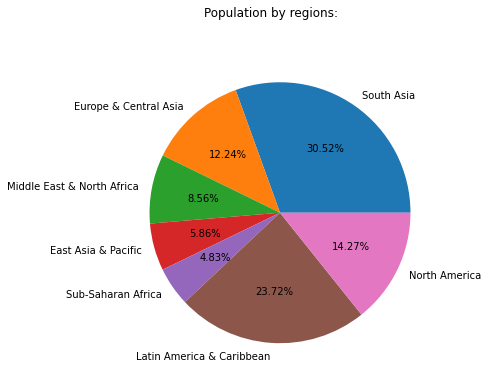

In [11]:

fig, axs = plt.subplots(figsize=(8,6))
fig.suptitle('Population by regions: ') 
axs.pie(dataset.groupby('Region').sum()['Populatiion'], labels = regions,autopct='%.2f%%')
plt.show()

Додаткове завдання.

Давайте завантажимо карту України та розмістимо бульбашки, що відповідають населенню в 5 містах : Київ, Луцьк, Черкаси, Донецьк, Запоріжжя.

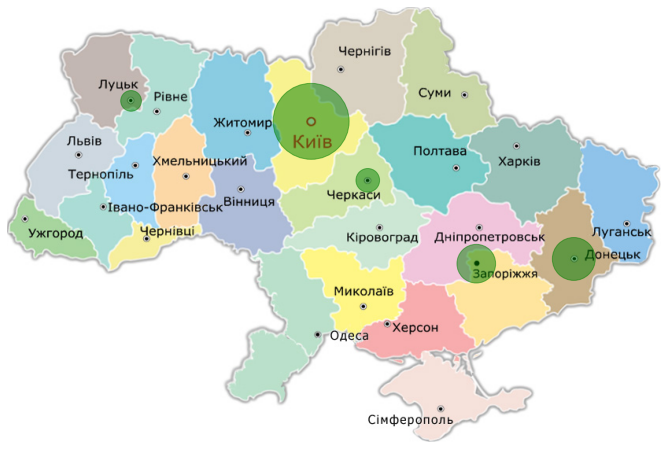

In [12]:
import numpy as np
import matplotlib.image as mpimg

citiesNames = ['Київ','Луцьк','Черкаси','Донецьк','Запоріжжя']
citiesCoords = np.array([(386,145),(157,119),(458,220),(720,320),(596,326)])
citiesPopulation = np.array([2.884,0.214,0.279,0.919,0.747])

imgMap = mpimg.imread('Ukraine.jpg')

footer, map = plt.subplots(figsize = (16,8))
footer.suptitle = ('Ukraine ')

map.imshow(imgMap)
map.scatter(
    citiesCoords[:, 0],
    citiesCoords[:, 1],
    s = citiesPopulation * 2000 ,
    c = 'green',
    alpha = 0.5,
)

map.axis('off')

plt.show()

Давайте знайдемо найбільшу відстань між містами в пікселях та кілометрах.

In [13]:
from scipy.spatial import distance

distances = distance.cdist(citiesCoords,citiesCoords,'euclidean')

index1, index2 = np.unravel_index(distances.argmax(),distances.shape)

print('The biggest distance is between: ' + str(citiesNames[index1]) + ' and ' + str(citiesNames[index2]))

distanceInPixels = distances[index1,index2]

print("In pixels:  %.3f" % (distanceInPixels))

distanceInKilometres = distanceInPixels * (1316/831)

print("In kilometres: %.3f" % (distanceInKilometres))



The biggest distance is between: Луцьк and Донецьк
In pixels:  597.804
In kilometres: 946.703


Тепер давайте побудуємо картограми для прибутку населення на 1 особу і ВВП по регіонам за 2016 рік.

In [14]:
import geopandas as geopd

geom = geopd.read_file('UKR_ADM1.shp')

datasetDPP = pd.read_csv('ukr_DPP.csv',sep=';', decimal=',', encoding='windows-1251', header=1 )
datasetGDP = pd.read_csv('ukr_GDP.csv',sep=';', decimal=',', encoding='windows-1251', header=1 )

datasetGDP.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     27 non-null     object 
 1   UKRname  27 non-null     object 
 2   2006     0 non-null      float64
 3   2007     0 non-null      float64
 4   2008     0 non-null      float64
 5   2009     0 non-null      float64
 6   2010     0 non-null      float64
 7   2011     0 non-null      float64
 8   2012     27 non-null     int64  
 9   2013     27 non-null     int64  
 10  2014     25 non-null     float64
 11  2015     25 non-null     float64
 12  2016     25 non-null     float64
dtypes: float64(9), int64(2), object(2)
memory usage: 2.9+ KB


Як ми бачимо, слід замінити типи деяких стовпців.

In [15]:
datasetGDP['2012']  = datasetGDP['2012'].astype(float)
datasetGDP['2013']  = datasetGDP['2013'].astype(float)
geoDataDPP = geopd.GeoDataFrame(pd.merge(geom,datasetDPP))
geoDataGDP = geopd.GeoDataFrame(pd.merge(geom,datasetGDP))

geoDataGDP.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ISO_Code    27 non-null     object  
 1   Level       27 non-null     object  
 2   Name        27 non-null     object  
 3   adm         27 non-null     object  
 4   adm_int     27 non-null     int64   
 5   feature_id  27 non-null     object  
 6   gbid        27 non-null     object  
 7   iso         27 non-null     object  
 8   geometry    27 non-null     geometry
 9   UKRname     27 non-null     object  
 10  2006        0 non-null      float64 
 11  2007        0 non-null      float64 
 12  2008        0 non-null      float64 
 13  2009        0 non-null      float64 
 14  2010        0 non-null      float64 
 15  2011        0 non-null      float64 
 16  2012        27 non-null     float64 
 17  2013        27 non-null     float64 
 18  2014        25 non-null     float64 
 19  20

Окей, тепер можемо працювати з цими даними. Побудуємо картограму по даним DPP за 2016 рік по регіонам.

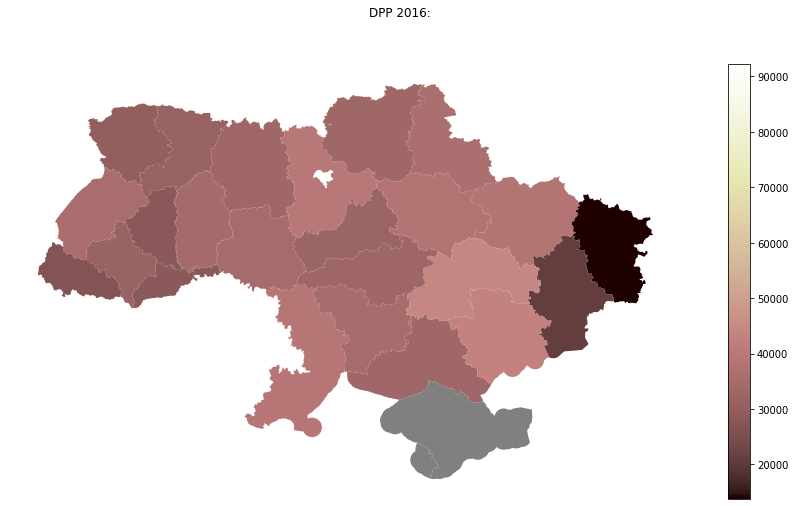

In [16]:
fig, ax = plt.subplots(1,1,figsize=(16,8))
fig.suptitle('DPP 2016: ')
geoDataDPP.plot(column = '2016',ax=ax,legend = True,missing_kwds = {"color":"grey"},cmap = 'pink')
ax.axis('off')
plt.show()

На жаль, про Крим немає даних про DPP в 2016 році, тому позначимо його сірим. Тепер давайте побудуємо картограму по даним GDP за 2016 рік по регіонам.

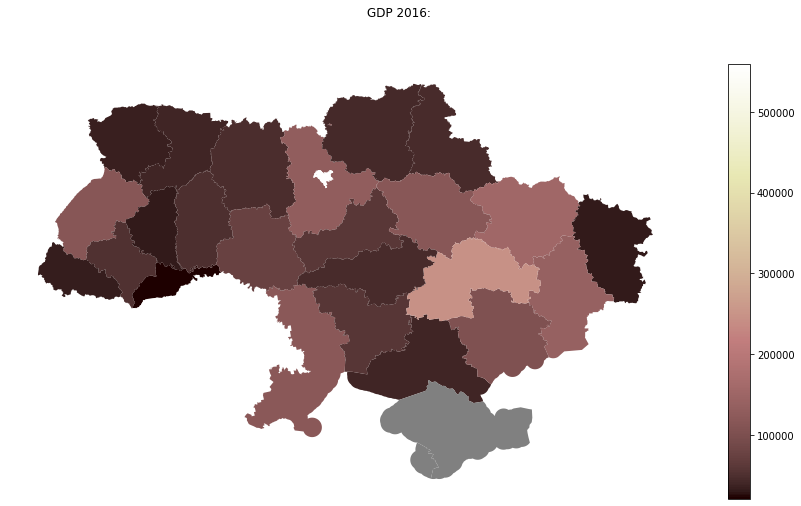

In [17]:
fig, ax = plt.subplots(1,1,figsize=(16,8))
fig.suptitle('GDP 2016: ')
geoDataGDP.plot(column = '2016',ax=ax,legend = True,missing_kwds = {"color":"grey"},cmap = 'pink')
ax.axis('off')
plt.show()

Тепер давайте порахуємо коефіцієнт кореляції між прибутком населення на 1 особу та ВВП та відобразимо на картограмі. Дані будемо брати за 2012-2016 роки, адже ми не маємо даних про GDP за 2006-2011 роки.

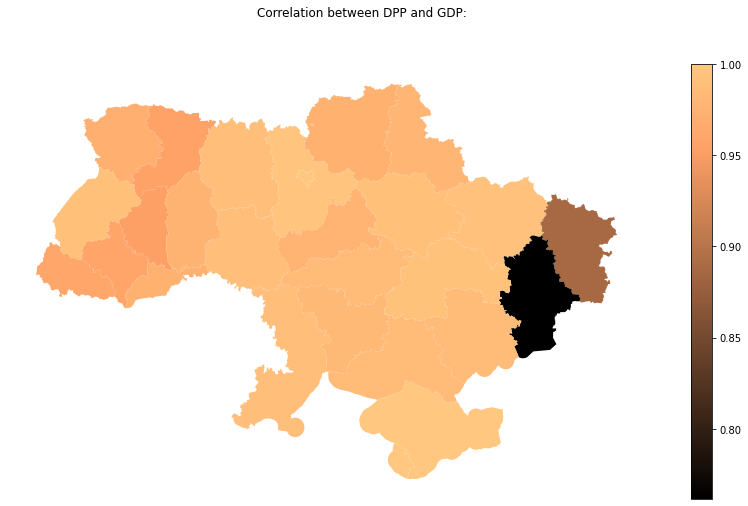

In [18]:
DPP = datasetDPP.iloc[:, -5:]
GDP = datasetGDP.iloc[:, -5:]

correlations = pd.DataFrame()
correlations['Correlation'] = DPP.corrwith(GDP,axis=1)
correlations['Name'] = datasetDPP['Name']

geomCorrelations = pd.merge(geom,correlations,on=['Name'])
 
fig, ax = plt.subplots(1,1,figsize=(16,8))
fig.suptitle('Correlation between DPP and GDP: ')
geomCorrelations.plot(column = 'Correlation',ax=ax,legend = True,missing_kwds = {"color":"grey"},cmap = 'copper')
ax.axis('off')
plt.show()

Отже, можемо зробити висновки, що практично у всіх областях України коефіцієнт кореляції між прибутком населення на 1 особу та ВВП прямує до 1, що означає досить сильну залежність між цими показниками.